# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = r"C:\Users\chere\OneDrive\Desktop\IPLDEAE\eae_ipld_project\data\cities_temperatures.csv"

temps_df = pd.read_csv(data_path)

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000
...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019
72728,US,Washington,49.6,2019-12-28,12,2019
72729,US,Washington,48.9,2019-12-29,12,2019
72730,US,Washington,55.0,2019-12-30,12,2019


In [3]:
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [4]:
temps_df["AvgTemperatureCelsius"] = ((temps_df['AvgTemperatureFahrenheit'] - 32)/1.8).round(1)

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.4
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.0
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.5
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.1
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.1
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.6
72728,US,Washington,49.6,2019-12-28,12,2019,9.8
72729,US,Washington,48.9,2019-12-29,12,2019,9.4
72730,US,Washington,55.0,2019-12-30,12,2019,12.8


In [5]:
city_list = temps_df['City'].unique().tolist()

unique_countries_list = len(city_list)

print(f'There are {unique_countries_list} unique cities in this dataset')

There are 10 unique cities in this dataset


In [6]:
min_date = temps_df['Date'].min()
max_date = temps_df['Date'].max()

print(f'Min date is {min_date}, Max date is {max_date}')

Min date is 2000-01-01, Max date is 2019-12-31


In [7]:
min_temp = temps_df['AvgTemperatureCelsius'].min()
max_temp = temps_df['AvgTemperatureCelsius'].max()

min_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'] == temps_df['AvgTemperatureCelsius'].min(),:]['City'].iloc[0]
min_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'] == temps_df['AvgTemperatureCelsius'].min(),:]['Date'].iloc[0]

max_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'] == temps_df['AvgTemperatureCelsius'].max(),:]['City'].iloc[0]
max_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'] == temps_df['AvgTemperatureCelsius'].max(),:]['Date'].iloc[0]

print(f'Min temp was {min_temp} in {min_temp_city} on {min_temp_date}. Max temp was {max_temp} in {max_temp_city} on {max_temp_date}')

Min temp was -16.8 in Munich on 2000-01-25. Max temp was 37.9 in Cairo on 2019-05-23


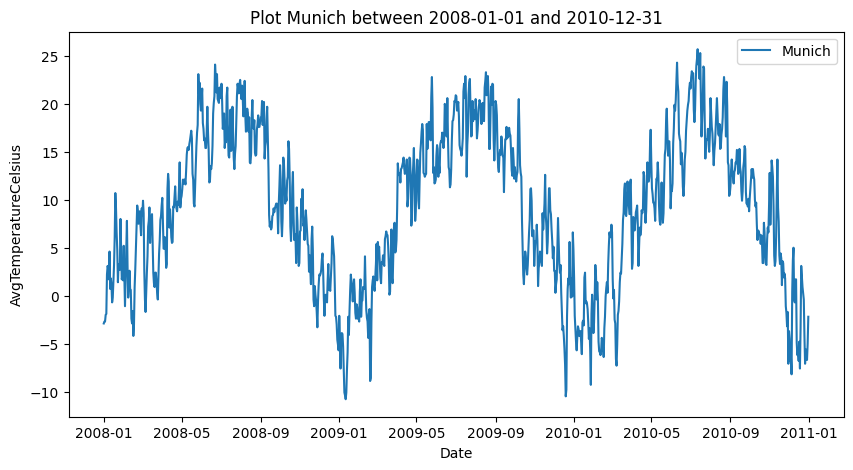

In [8]:
city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df['City'] == city]

city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]

plt.figure(figsize=(10, 5))

plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'])
plt.title(f'Plot Munich between {start_date} and {end_date}')
plt.xlabel('Date')
plt.ylabel('AvgTemperatureCelsius')
plt.legend(['Munich'])

plt.show()

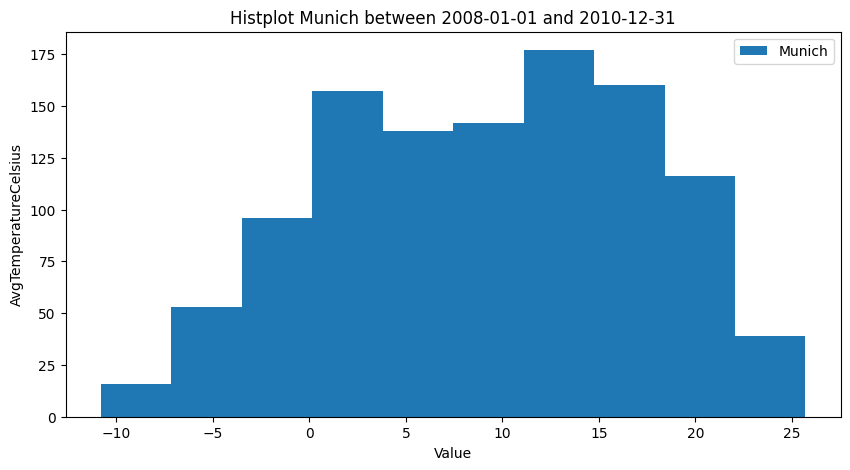

In [9]:
plt.figure(figsize=(10, 5))

plt.hist(city_df_period['AvgTemperatureCelsius'])
plt.title(f'Histplot Munich between {start_date} and {end_date}')
plt.xlabel('Value')
plt.ylabel('AvgTemperatureCelsius')
plt.legend(['Munich'])

plt.show()


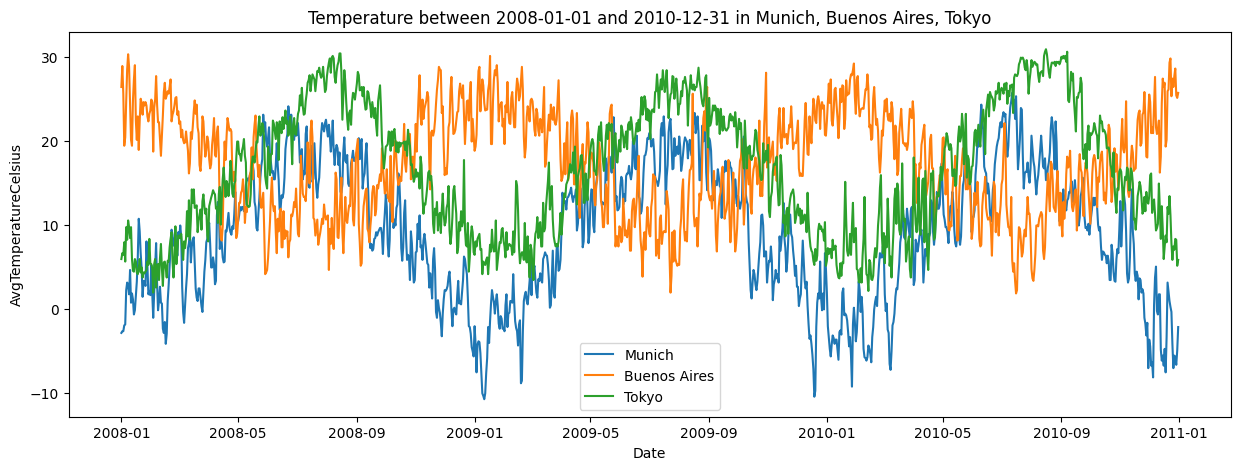

In [10]:
selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

cities_df = temps_df[temps_df['City'].isin(selected_cities)]

cities_df_period = cities_df[(cities_df['Date'] >= start_date) & (cities_df['Date'] <= end_date)]


plt.figure(figsize=(15, 5))

for city in selected_cities:
    plt.plot(cities_df_period[cities_df_period['City'] == city]['Date'], cities_df_period[cities_df_period['City'] == city]['AvgTemperatureCelsius'])

plt.title(f'Temperature between {start_date} and {end_date} in {', '.join(selected_cities)}')
plt.xlabel('Date')
plt.ylabel('AvgTemperatureCelsius')

plt.legend(selected_cities)

plt.show()

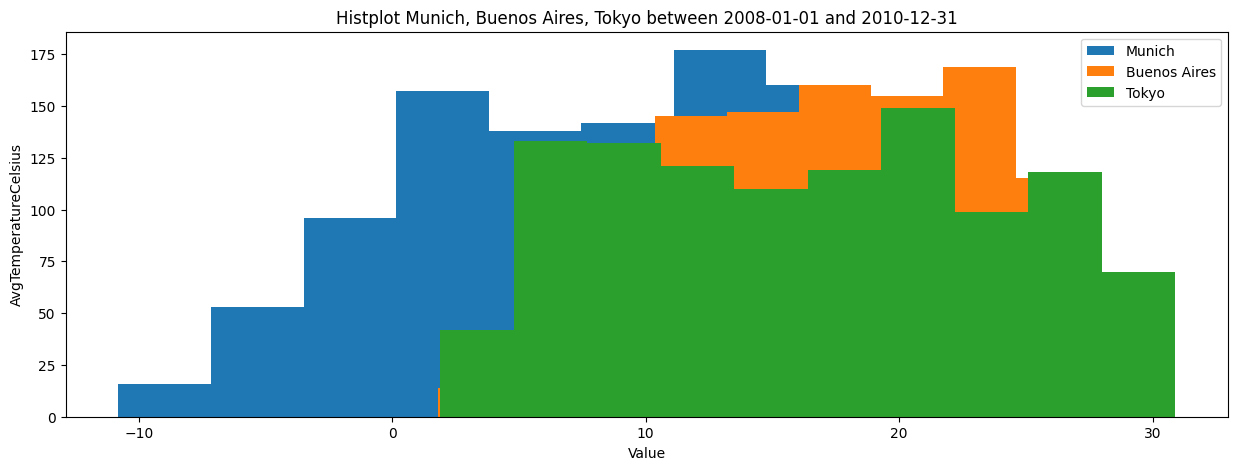

In [11]:
selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

cities_df = temps_df[temps_df['City'].isin(selected_cities)]

cities_df_period = cities_df[(cities_df['Date'] >= start_date) & (cities_df['Date'] <= end_date)]

plt.figure(figsize=(15, 5))

for city in selected_cities:
    plt.hist(cities_df_period[cities_df_period['City'] == city]['AvgTemperatureCelsius'])
    
plt.title(f'Histplot {', '.join(selected_cities)} between {start_date} and {end_date}')
plt.xlabel('Value')
plt.ylabel('AvgTemperatureCelsius')

plt.legend(selected_cities)

plt.show()